<div class="alert alert-block alert-info">
    <b>Projet 5 | Segmentez des clients d'un site e-commerce<br></b>
    <p style="color:#8B0000;">
        Partie 2 |  Modélisation & Essais </p>
</div>

# Préparation notebook | Import des packages et données

Notebook variables reset for each complete execution of this code :

In [1]:
%reset -f

## 1 | Vérification de la version de Python

In [2]:
!python -V

Python 3.7.0


## 2 | Installation des nouveaux packages nécessaire

In [3]:
# installing chart_studio
!pip install chart_studio

In [4]:
# installing yellowbrick.cluster
!pip install yellowbrick

## 3 | Import des packages utiles au projet

In [5]:
# Modules classiques d'analyse exploratoire:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno
import scipy.stats as stats
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

# Mathématiques
import math

# Manipulation fichiers et Interaction avec l'os / notebook
import os
import csv
import requests
import warnings
import json
import autopep8
from pickle import dump

# Manipulation de chaines de caractères
# from ast import literal_eval #abstract syntax tree
# from bs4 import BeautifulSoup as soup

# Données géographiques et géométriques
# import geopy
# from geopy.distance import geodesic
# import re
# from geopy.extra.rate_limiter import RateLimiter
# from shapely.geometry import Point
# import folium
# import folium.plugins

# Manipulations temporelles
import datetime as dt
# from tqdm import tqdm
# from tqdm.notebook import tqdm, trange
import time

# Extraction web
# from urllib.request import urlopen as uReq # Web client
# import urllib.request # Web client
# from importlib_metadata import version

# Feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.cluster import KMeans

## 4 | Vérification des versions de package disponibles

In [6]:
!pip list

Package                           Version
--------------------------------- ------------
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
attrs                             21.4.0
autopep8                          1.6.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            4.1.0
branca                            0.5.0
bs4                               0.0.1
certifi                           2021.10.8
cffi                              1.15.0
charset-normalizer                2.0.12
chart-studio                      1.1.0
colorama                          0.4.4
cycler                            0.11.0
debugpy                           1.5.1
decorator                         5.1.1
defusedxml                        0.7.1
distlib                           0.3.4
entrypoints                       0.4
filelock                          3.6.0
folium                            0.12.1.post1
fonttools      

## 5 | Fonctions utiles au projet 

In [7]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 6 | Mise en page et réglages divers du notebook

In [8]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# to make this notebook's output stable across runs
np.random.seed(42)

## 7 | Chargement, préparation et échantillonnage des données | Step 0

Chargement du contenu des fichiers **data1.pkl** et **data_raw.pkl** via la fonction **load_data**:

In [9]:
def load_data():
    data = pd.read_pickle('data1.pkl')
    data_raw = pd.read_pickle('data_raw.pkl')
    return (data, data_raw)

In [10]:
data, data_raw = load_data()

In [11]:
data.shape

(94720, 9)

In [12]:
data_raw.shape

(97916, 12)

On a bien récupéré les mêmes données que celles exportées depuis le notebook 01_Exploration.

# 5 | Segmentation RSM - approche métier classique

## 5.1 | Création de segments RSM via méthode des quantiles

Afin de pouvoir comparer les approches classiques et machine learning, je vais commencer par réaliser une segmentation selon la **méthode classique**, qui classe d'abord les valeurs dans des quantiles :

Nous avons identifié que 3% des clients seulement ont passé plus d'une commande.<br>
Le critère de **Fréquence** dans la classification RFM sera donc très peu utile pour dégager une segmentation.

Nous allons lui **préférer le review score moyen par client**, qui est quant à lui très bien renseigné.<br>

Donc à la **lettre F** de RFM nous allons préférer la **lettre S pour Satisfaction**.

Création de quantiles pour associer les clients aux score RSM

In [13]:
data.satisfaction.describe()

count    94720.000000
mean         4.102521
std          1.326359
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: satisfaction, dtype: float64

In [14]:
data.satisfaction.unique()

array([5.        , 4.        , 3.        , 1.        , 4.5       ,
       2.        , 3.5       , 4.33333333, 4.66666667, 4.75      ,
       2.5       , 2.75      , 2.33333333, 4.25      , 3.75      ,
       3.66666667, 3.77777778, 3.25      , 1.5       , 2.16666667,
       3.9       , 2.77777778, 4.83333333, 1.66666667, 4.2       ,
       1.25      , 3.8       , 1.33333333, 1.75      , 3.33333333,
       2.66666667, 4.44444444, 3.83333333, 3.4       ])

**Note :**<br>
According to this description of the **feature 'satisfaction'** (or **'S'**), we reach our **maximum value of 5 at quantile 50%**, meaning that there will be only **2 levels** for this quantile: 1 (below 4), 2 (above 4). 

In [15]:
# Split into four segments using quantiles
quantiles = data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [16]:
quantiles

{'recency': {0.25: 119.0, 0.5: 224.0, 0.75: 353.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 63.1, 0.5: 107.85, 0.75: 182.91},
 'satisfaction': {0.25: 4.0, 0.5: 5.0, 0.75: 5.0},
 'nb_articles': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'nb_diff_products': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'aver_basket': {0.25: 62.39, 0.5: 105.71, 0.75: 176.98}}

In [17]:
# Functions to create R, F and M segments
# Group = 444 or Score = 12 should reflect our best customers

# For Recency 1 is better than 4 : the more recent (lower the figure) the better.
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# For Monetary, Frequency and Satisfaction 4 is better than 1 : the higher the figure the better.


def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [18]:
# # Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
data['R'] = data['recency'].apply(
    RScoring, args=('recency', quantiles,))
data['F'] = data['frequency'].apply(
    FnMScoring, args=('frequency', quantiles,))
data['M'] = data['monetary'].apply(
    FnMScoring, args=('monetary', quantiles,))
data['S'] = data['satisfaction'].apply(
    FnMScoring, args=('satisfaction', quantiles,))
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S  
customer_unique_id                            
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2  
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1  
0000f46a3911fa3c0805444483337064  1  1  2  1  
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1  
0004aac84e0df4da2b147fca70cf8255  2  1  4  2

In [19]:
# Calculate and add RFMGroup value column showing combined concatenated score of RFM
data['RSMGroup'] = data.R.map(str) + data.S.map(str) + data.M.map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
data['RSMScore'] = data[['R', 'S', 'M']].sum(axis=1)
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S RSMGroup  RSMScore  
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2      423         9  
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6  
0000f46a3911fa3c0805444483337064  1  1  2  1      112         4  
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4  
0004aac84e0df4da2b147fca70cf8255  2  1  4  2      224         8

In [20]:
data.RSMScore.describe()

count    94720.000000
mean         6.583963
std          1.667268
min          3.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: RSMScore, dtype: float64

-  10 is the best RSM score possible (R=4 + S=2 + M=4)
-  3 is the worst one (R=1 + S=1 + M=1)

In [21]:
# Assign Loyalty Level to each customer
Loyalty_Level = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(data.RSMScore, q=4, labels=Loyalty_Level)
data['RSM_Loyalty_Level'] = Score_cuts.values
data.reset_index().head()

customer_unique_id  recency  frequency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19   
2  0000f46a3911fa3c0805444483337064      542          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      293          1    196.89   

   satisfaction  nb_articles  nb_diff_products day_last_purch  aver_basket  \
0           5.0          1.0               1.0       Thursday       141.90   
1           4.0          1.0               1.0         Monday        27.19   
2           3.0          1.0               1.0         Friday        86.22   
3           4.0          1.0               1.0       Thursday        43.62   
4           5.0          1.0               1.0        Tuesday       196.89   

  aver_basket_cat  R  F  M  S RSMGroup  RSMScore RSM_Loyalty_Level  
0         100-500  4  1  3  2      423         9          Platinum  
1           10-50  4  1  1  1      411         6            Silver  
2          50-100  1  1  2  1      112         4            Bronze  
3           10-50  2  1  1  1      211         4            Bronze  
4         100-500  2  1  4  2      224         8              Gold

In [22]:
# Validate the data for RSMGroup = 424
data[data['RSMGroup'] == '424'].sort_values(
    'monetary', ascending=False).reset_index().head(10)

customer_unique_id  recency  frequency  monetary  \
0  48e1ac109decbb87765a3eade6854098       73          1   4681.78   
1  edde2314c6c30e864a128ac95d6b2112       31          1   4513.32   
2  a229eba70ec1c2abef51f04987deb7a5       95          1   4445.50   
3  58483a1c055dfb600f57c5b867174542       90          1   4034.44   
4  95a744604de66a2e40e18086e69be4f2       59          1   3406.47   
5  be825ddd3b40db3f91bf05b4e9435d56       84          1   3122.72   
6  f886a3f43af9ac928fbb4b56436c528c       19          1   3076.13   
7  fff5eb4918b2bf4b2da476788d42051c       63          1   2844.96   
8  8ad6fdb3d658f916f444aaf55a49bb29       97          1   2828.42   
9  34ff67eb3466a779b2f6b6fd56a3b953       95          1   2787.87   

   satisfaction  nb_articles  nb_diff_products day_last_purch  aver_basket  \
0           5.0          1.0               1.0         Friday      4681.78   
1           5.0          1.0               1.0         Friday      4513.32   
2           5.0          2.0               2.0       Thursday      4445.50   
3           5.0          1.0               1.0        Tuesday      4034.44   
4           5.0          1.0               1.0         Friday      3406.47   
5           5.0          4.0               1.0         Monday      3122.72   
6           5.0          1.0               1.0      Wednesday      3076.13   
7           5.0          6.0               1.0         Monday      2844.96   
8           5.0          1.0               1.0        Tuesday      2828.42   
9           5.0          1.0               1.0       Thursday      2787.87   

  aver_basket_cat  R  F  M  S RSMGroup  RSMScore RSM_Loyalty_Level  
0      1000-10000  4  1  4  2      424        10          Platinum  
1      1000-10000  4  1  4  2      424        10          Platinum  
2      1000-10000  4  1  4  2      424        10          Platinum  
3      1000-10000  4  1  4  2      424        10          Platinum  
4      1000-10000  4  1  4  2      424        10          Platinum  
5      1000-10000  4  1  4  2      424        10          Platinum  
6      1000-10000  4  1  4  2      424        10          Platinum  
7      1000-10000  4  1  4  2      424        10          Platinum  
8      1000-10000  4  1  4  2      424        10          Platinum  
9      1000-10000  4  1  4  2      424        10          Platinum

We verified that for this particular **RSMGroup = 424**, id est our best customers, they are correctly associated with a **Platinum RSM_Loyalty_Level**. 

Based on this RSM modelling, what could be the marketing strategy now?
Customers with RSM group 444 are the best customers and we can try to :
-  crosssale other products of our brand
-  encourage them to sign for loyalty programs to enjoy some lead experiences like 
 - free same day shipping,
 - priority acces to newly launched products,
 - etc...
 
 
On the other hand, if the customer is falling into RSM group 111 then company my offer 
-  rewards
-  coupon

to trigger the spending from these almost churned out customers


## 5.2 | Visualisation des segments RSM (clusters)

In [23]:
# Recency Vs Frequency

# First we limit the number and span of records to allow a better visualization
# and clearly see the data points on the graph
graph = data.sample(frac=0.05, random_state=42).query(
    "monetary < 10000 and frequency < 16")

# Then we create a scatter plot Recency on x axis, Frequency on y axis
# both for RFM_Loyalty_Level as bronze
# Each data point is represented as a marker point
# We name these data "Bronze" as they are associated with this particular RFM_Loyalty_Level

# Same code for silver, gold and platinum and unique difference
# Is the size of the markers and the color

plot_data = [
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Bronze'")['satisfaction'],
        mode='markers',
        name='Bronze',
        marker=dict(size=7,
                    line=dict(width=1),
                    color='blue',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Silver'")['satisfaction'],
        mode='markers',
        name='Silver',
        marker=dict(size=9,
                    line=dict(width=1),
                    color='green',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Gold'")['satisfaction'],
        mode='markers',
        name='Gold',
        marker=dict(size=11,
                    line=dict(width=1),
                    color='red',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Platinum'")['satisfaction'],
        mode='markers',
        name='Platinum',
        marker=dict(size=13,
                    line=dict(width=1),
                    color='black',
                    opacity=0.5
                    )
    ),
]

# Setting up layout parameters (labels, titles)
plot_layout = gobj.Layout(
    yaxis={'title': "satisfaction"},
    xaxis={'title': "recency"},
    title='Segments'
)

# We plot these scatterplots using these lines of code
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [24]:
graph.shape

(4736, 16)

In [25]:
# satisfaction Vs monetary

# First we limit the number and span of records to allow a better visualization
# and clearly see the data points on the graph
graph = data.sample(frac=0.05, random_state=42).query(
    "monetary < 10000 and frequency < 16")

# Then we create a scatter plot Recency on x axis, Frequency on y axis
# both for RFM_Loyalty_Level as bronze
# Each data point is represented as a marker point
# We name these data "Bronze" as they are associated with this particular RSM_Loyalty_Level

# Same code for silver, gold and platinum and unique difference
# Is the size of the markers and the color

plot_data = [
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Bronze'")['satisfaction'],
        y=graph.query("RSM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker=dict(size=7,
                    line=dict(width=1),
                    color='blue',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Silver'")['satisfaction'],
        y=graph.query("RSM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker=dict(size=9,
                    line=dict(width=1),
                    color='green',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Gold'")['satisfaction'],
        y=graph.query("RSM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker=dict(size=11,
                    line=dict(width=1),
                    color='red',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Platinum'")['satisfaction'],
        y=graph.query("RSM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker=dict(size=13,
                    line=dict(width=1),
                    color='black',
                    opacity=0.5
                    )
    ),
]

# Setting up layout parameters (labels, titles)
plot_layout = gobj.Layout(
    yaxis={'title': "monetary"},
    xaxis={'title': "satisfaction"},
    title='Segments'
)

# We plot these scatterplots using these lines of code
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [26]:
# recency Vs monetary

# First we limit the number and span of records to allow a better visualization
# and clearly see the data points on the graph
graph = data.sample(frac=0.05, random_state=42).query(
    "monetary < 10000 and frequency < 16")

# Then we create a scatter plot Recency on x axis, Frequency on y axis
# both for RFM_Loyalty_Level as bronze
# Each data point is represented as a marker point
# We name these data "Bronze" as they are associated with this particular RFM_Loyalty_Level

# Same code for silver, gold and platinum and unique difference
# Is the size of the markers and the color

plot_data = [
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker=dict(size=7,
                    line=dict(width=1),
                    color='blue',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker=dict(size=9,
                    line=dict(width=1),
                    color='green',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker=dict(size=11,
                    line=dict(width=1),
                    color='red',
                    opacity=0.5
                    )
    ),
    gobj.Scatter(
        x=graph.query("RSM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RSM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker=dict(size=13,
                    line=dict(width=1),
                    color='black',
                    opacity=0.5
                    )
    ),
]

# Setting up layout parameters (labels, titles)
plot_layout = gobj.Layout(
    yaxis={'title': "monetary"},
    xaxis={'title': "recency"},
    title='Segments'
)

# We plot these scatterplots using these lines of code
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

## 5.3 | Description des segments RSM (clusters)

In [27]:
data[['recency', 'R', 'satisfaction', 'S', 'RSM_Loyalty_Level', 'monetary',
      'M']].groupby(by='RSM_Loyalty_Level').agg(['min', 'max', 'mean', 'median'])

recency                           R                       \
                      min  max        mean median min max      mean median   
RSM_Loyalty_Level                                                            
Bronze                120  729  371.152775    375   1   3  1.534633      1   
Silver                  5  700  246.243406    230   1   4  2.460657      2   
Gold                    5  353  152.833522    148   2   4  3.178189      3   
Platinum                0  224   87.987344     81   3   4  3.765744      4   

                  satisfaction                         S                       \
                           min  max      mean median min max      mean median   
RSM_Loyalty_Level                                                               
Bronze                     1.0  5.0  3.804522    4.0   1   2  1.416295      1   
Silver                     1.0  5.0  4.081140    5.0   1   2  1.577372      2   
Gold                       1.0  5.0  4.232394    5.0   1   2  1.658660      2   
Platinum                   1.0  5.0  4.604320    5.0   1   2  1.818977      2   

                  monetary                                 M                \
                       min       max        mean  median min max      mean   
RSM_Loyalty_Level                                                            
Bronze               10.07    182.91   66.189048   58.62   1   3  1.524419   
Silver                9.59  13664.08  157.498444  107.80   1   4  2.481849   
Gold                 63.12   3526.46  224.149434  158.21   2   4  3.163151   
Platinum            107.92   7274.88  319.800529  221.43   3   4  3.702002   

                          
                  median  
RSM_Loyalty_Level         
Bronze                 1  
Silver                 2  
Gold                   3  
Platinum               4

**General :**<br>
-  **satisfaction** is not really relevant to discriminate clusters, as its mean is barely moving up, due to the fact that there is only 2 values that the quantile feature can take : 1 or 2. This feature will not provide clear explanation about the customer, except general observation that "the higher the Loyalty, the higher the satisfaction".<br>
I will skip this feature in the upcoming description.

**Bronze :**<br>
-  **recency** : in average **371 days** since last purchase on the site. Our oldest customers.
-  **monetary** : total purchase of **66 Reais** in average in this segment

**Silver :**<br>
-  **recency** : in average **246 days** since last purchase on the site. Pretty old customers.
-  **monetary** : total purchase of **158 Reais** in average in this segment (yet it contains our best customer in value - 13664 R$)

**Gold :**<br>
-  **recency** : in average **148 days** since last purchase on the site. Not that recent customers.
-  **monetary** : total purchase of **225 Reais** in average in this segment

**Platinum :**<br>
-  **recency** : in average **88 days** since last purchase on the site. The most recent customers.
-  **monetary** : total purchase of **321 Reais** in average in this segment


Nous ne pouvons pas décrire beaucoup notre clientèle plus via cette segmentation.<br>

Essayons maintenant à travers une segmentation K-Means

# 6 | K-Means Clustering - features RAM et RAMS

**A remplace F :**<br>
Ici nous allons préférer les données issues de l'**average basket** (A de aver_basket) à celles issues de la **fréquence d'achat** (F de frequency), information trop peu discriminante (seulement 3% de clients avec plus d'une commande).

Néanmoins, à quelques exception près, on peut également anticiper que cette feature **average basket** apportera malheureusement assez peu de nouvelles informations. En effet, de par sa construction, pour chaque client, l'average basket = monetary / nombre d'achats qui assez souvent égal à 1. Cette feature sera donc très corrélée à 'monetary'.

Nous allons utiliser trois critères pour mesurer l'homogénéité et la séparation des clusters ainsi créés : 
-  **l'inertie** : pour évaluer la variance et donc l'homogénéité intra cluster
-  **le silhouette score** : pour évaluer à la fois l'homogénéité intra cluster et la séparation inter clusters. Il est plus gourmand en temps de calcul, car il évalue toutes les distances entre chaque point et les différents clusters possibles.
-  **le calinski harabasz** : c'est le rapport entre la variance inter-groupes et la variance intra-groupe. Il se rapproche beaucoup du critère utilisé pour stopper certains algorithmes de partitionnement, comme les K-means. De tels algorithmes vont donc maximiser ce score, par construction.

La stratégie suivie pour identifier le nombre de clusters cible sera celle-ci:
- première tentative via **l'inertie**
- pré-sélection via **silhouette score** des **2 k candidats principaux**
- choix final via **calinski harabasz**

## 6.1 | Log transformation

Pour que les algorithmes de machine learning soient efficaces dans le traitement de données continues situées sur des échelles parfois très grandes (monetary, recency, aver_basket), nous avons besoin de "rapprocher" ces données extrêmes. Pour ce faire nous passons par la fonction logarithme. 

In [28]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [29]:
# Apply handle_neg_n_zero function to Recency and Monetary columns
data['recency_log'] = [handle_neg_n_zero(x) for x in data.recency]
data['aver_basket_log'] = [handle_neg_n_zero(x) for x in data.monetary]
data['monetary_log'] = [handle_neg_n_zero(x) for x in data.monetary]

In [30]:
# Perform Log transformation to bring data into normal or near normal distribution
data[['recency_log', 'aver_basket_log', 'monetary_log']] = data[['recency_log', 'aver_basket_log', 'monetary_log']].apply(
    np.log, axis=1).round(3)

In [31]:
# Log_Tfd_Data = pd.merge(Log_Tfd_Data, data[[
#                         'recency', 'aver_basket', 'monetary',
#                         'satisfaction', 'nb_articles', 'nb_diff_products']],
#                         how='left', on='customer_unique_id')

In [32]:
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S RSMGroup  RSMScore  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2      423         9   
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6   
0000f46a3911fa3c0805444483337064  1  1  2  1      112         4   
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4   
0004aac84e0df4da2b147fca70cf8255  2  1  4  2      224         8   

                                 RSM_Loyalty_Level  recency_log  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          Platinum        4.754   
0000b849f77a49e4a4ce2b2a4ca5be3f            Silver        4.779   
0000f46a3911fa3c0805444483337064            Bronze        6.295   
0000f6ccb0745a6a4b88665a16c9f078            Bronze        5.787   
0004aac84e0df4da2b147fca70cf8255              Gold        5.680   

                                  aver_basket_log  monetary_log  
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2            4.955         4.955  
0000b849f77a49e4a4ce2b2a4ca5be3f            3.303         3.303  
0000f46a3911fa3c0805444483337064            4.457         4.457  
0000f6ccb0745a6a4b88665a16c9f078            3.776         3.776  
0004aac84e0df4da2b147fca70cf8255            5.283         5.283

In [33]:
data.describe()

recency     frequency      monetary  satisfaction   nb_articles  \
count  94720.000000  94720.000000  94720.000000  94720.000000  94720.000000   
mean     243.338978      1.033742    165.778740      4.102521      1.138260   
std      153.164269      0.210529    227.126785      1.326359      0.522174   
min        0.000000      1.000000      9.590000      1.000000      1.000000   
25%      119.000000      1.000000     63.100000      4.000000      1.000000   
50%      224.000000      1.000000    107.850000      5.000000      1.000000   
75%      353.000000      1.000000    182.910000      5.000000      1.000000   
max      729.000000     16.000000  13664.080000      5.000000     21.000000   

       nb_diff_products   aver_basket             R             F  \
count      94720.000000  94720.000000  94720.000000  94720.000000   
mean           1.036751    160.829612      2.504307      1.090868   
std            0.218909    219.979710      1.117635      0.514149   
min            1.000000      9.590000      1.000000      1.000000   
25%            1.000000     62.390000      2.000000      1.000000   
50%            1.000000    105.710000      3.000000      1.000000   
75%            1.000000    176.980000      4.000000      1.000000   
max            8.000000  13664.080000      4.000000      4.000000   

                  M             S      RSMScore   recency_log  \
count  94720.000000  94720.000000  94720.000000  94720.000000   
mean       2.499588      1.580068      6.583963      5.204618   
std        1.118380      0.493550      1.667268      0.884737   
min        1.000000      1.000000      3.000000      0.000000   
25%        1.000000      1.000000      5.000000      4.779000   
50%        2.000000      2.000000      7.000000      5.412000   
75%        3.000000      2.000000      8.000000      5.866000   
max        4.000000      2.000000     10.000000      6.592000   

       aver_basket_log  monetary_log  
count     94720.000000  94720.000000  
mean          4.719050      4.719050  
std           0.817995      0.817995  
min           2.261000      2.261000  
25%           4.145000      4.145000  
50%           4.681000      4.681000  
75%           5.209000      5.209000  
max           9.523000      9.523000

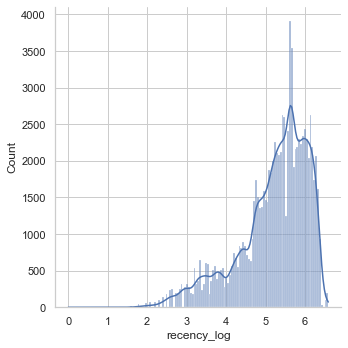

In [34]:
# Data distribution after data normalization for Recency
Recency_Plot = data['recency_log']
ax = sns.displot(Recency_Plot, kde=True)

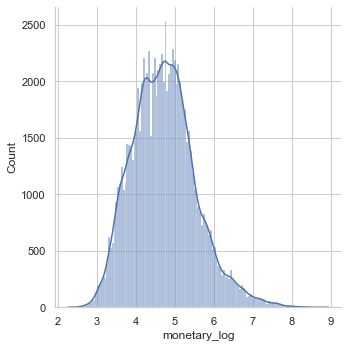

In [35]:
# Data distribution after data normalization for Monetary
Monetary_Plot = data.query('monetary < 10000')['monetary_log']
ax = sns.displot(Monetary_Plot, kde=True)

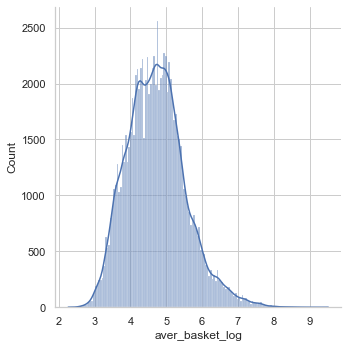

In [36]:
# Data distribution after data normalization for Aver_basket
Aver_basket_Plot = data['aver_basket_log']
ax = sns.displot(Aver_basket_Plot, kde=True)

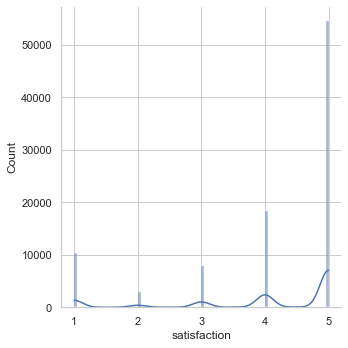

In [37]:
# Data distribution after data normalization for Frequency
Satisfaction_Plot = data['satisfaction']
ax = sns.displot(Satisfaction_Plot, kde=True)

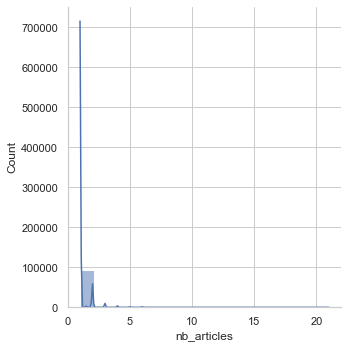

In [38]:
# Data distribution after data normalization for nb_articles
Nb_articles_Plot = data['nb_articles']
ax = sns.displot(Nb_articles_Plot, kde=True)

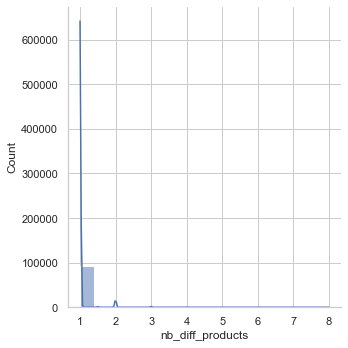

In [39]:
# Data distribution after data normalization for nb_diff_products
Nb_diff_products_Plot = data['nb_diff_products']
ax = sns.displot(Nb_diff_products_Plot, kde=True)

J'exporte data au format pickle pour la 3e partie :

In [40]:
data.shape

(94720, 19)

In [41]:
data.to_pickle("data2.pkl")  # cleaned raw data

## 6.2 | Standardisation

Here are the useful features selected for the model : 

In [42]:
useful_features = ['recency_log', 'aver_basket_log',
                   'monetary_log', 'satisfaction', 'nb_articles', 'nb_diff_products']

In [43]:
# Bring the data on same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(data.loc[:, useful_features])

In [44]:
# Transform it back to dataframe
Scaled_Data = pd.DataFrame(
    Scaled_Data, index=data.index, columns=data.loc[:, useful_features].columns)

In [45]:
Scaled_Data.head()

recency_log  aver_basket_log  monetary_log  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2    -0.509326         0.288451      0.288451   
0000b849f77a49e4a4ce2b2a4ca5be3f    -0.481069        -1.731132     -1.731132   
0000f46a3911fa3c0805444483337064     1.232443        -0.320358     -0.320358   
0000f6ccb0745a6a4b88665a16c9f078     0.658258        -1.152885     -1.152885   
0004aac84e0df4da2b147fca70cf8255     0.537318         0.689434      0.689434   

                                  satisfaction  nb_articles  nb_diff_products  
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      0.676652    -0.264779         -0.167884  
0000b849f77a49e4a4ce2b2a4ca5be3f     -0.077295    -0.264779         -0.167884  
0000f46a3911fa3c0805444483337064     -0.831243    -0.264779         -0.167884  
0000f6ccb0745a6a4b88665a16c9f078     -0.077295    -0.264779         -0.167884  
0004aac84e0df4da2b147fca70cf8255      0.676652    -0.264779         -0.167884

In [46]:
Scaled_Data_RAM = Scaled_Data[[
    'recency_log', 'aver_basket_log', 'monetary_log']]

In [47]:
Scaled_Data_RAMS = Scaled_Data[[
    'recency_log', 'aver_basket_log', 'monetary_log', 'satisfaction']]

In [48]:
Scaled_Data_RAMS_ext = Scaled_Data[['recency_log', 'aver_basket_log',
                                    'monetary_log', 'satisfaction', 'nb_articles', 'nb_diff_products']]

J'exporte le scaler et Scaled_Data_RAMS au format pickle pour la 3e partie :

In [49]:
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [50]:
Scaled_Data_RAMS.shape

(94720, 4)

In [51]:
# save the scaled data
Scaled_Data_RAMS.to_pickle("Scaled_Data_RAMS.pkl")

## 6.3 | Construction modèle Kmeans - données RAM | Inertia

Effectuons tout d'abord un clustering sur la base des 3 critères de base de la classification RFM, en remplaçant cette fois-ci le "F" de frequency par le "A" de average basket.

In [52]:
# Let's build the kmeans model for a range of 15 k
# and measure its performance with the inertia metric

sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(Scaled_Data_RAM)
    sum_of_sq_dist[k] = km.inertia_

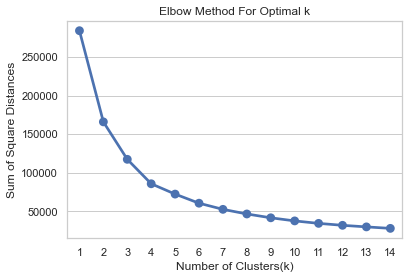

In [53]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This graph shows that **creating 4 clusters** seems to be the best compromise between **precision (square distance reduction)** and **cost efficiency (elbow of the curve)**.<br>
A **reduced number of clusters** will also allow a **better understanding** of the differences between clusters, hence a better **course of specific actions** on each cluster.

In [54]:
# Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
KMean_clust.fit(Scaled_Data_RAM)

# Find the clusters for the observation given in the dataset
data['Cluster'] = KMean_clust.labels_
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S RSMGroup  RSMScore  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2      423         9   
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6   
0000f46a3911fa3c0805444483337064  1  1  2  1      112         4   
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4   
0004aac84e0df4da2b147fca70cf8255  2  1  4  2      224         8   

                                 RSM_Loyalty_Level  recency_log  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          Platinum        4.754   
0000b849f77a49e4a4ce2b2a4ca5be3f            Silver        4.779   
0000f46a3911fa3c0805444483337064            Bronze        6.295   
0000f6ccb0745a6a4b88665a16c9f078            Bronze        5.787   
0004aac84e0df4da2b147fca70cf8255              Gold        5.680   

                                  aver_basket_log  monetary_log  Cluster  
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2            4.955         4.955        3  
0000b849f77a49e4a4ce2b2a4ca5be3f            3.303         3.303        0  
0000f46a3911fa3c0805444483337064            4.457         4.457        3  
0000f6ccb0745a6a4b88665a16c9f078            3.776         3.776        0  
0004aac84e0df4da2b147fca70cf8255            5.283         5.283        3

In [55]:
data.Cluster.unique()

array([3, 0, 1, 2])

<Figure size 504x504 with 0 Axes>

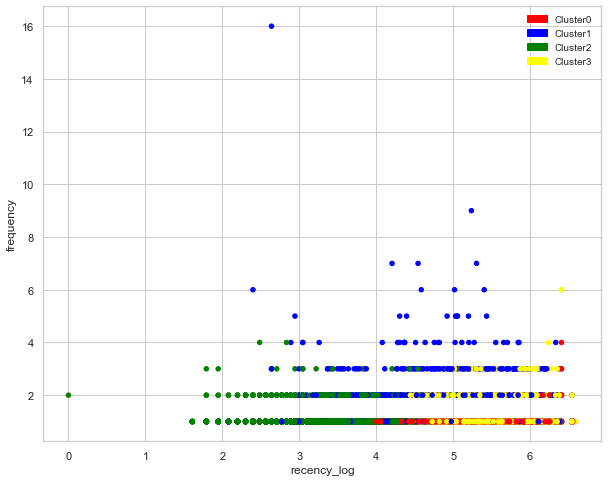

In [56]:
import matplotlib
plt.figure(figsize=(7, 7))

# Scatter Plot frequency Vs recency
Colors = ["red", "blue", "green", "yellow"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="frequency",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('outlier', xy=(25, 16), xytext=(100, 15),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3'], markerscale=100, frameon=False, fontsize=10)

In [57]:
data[data['Cluster'] == 0]

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
00050ab1314c0e55a6ca13cf7181fecf      136          1     35.38           4.0   
0006fdc98a402fceb4eb0ee528f6a8d4      412          1     29.00           3.0   
00090324bbad0e9342388303bb71ba0a      163          1     63.66           5.0   
...                                   ...        ...       ...           ...   
fff1afc79f6b5db1e235a4a6c30ceda7      369          1     50.09           5.0   
fff699c184bcc967d62fa2c6171765f7      367          1     55.00           4.0   
fffa431dd3fcdefea4b1777d114144f2      308          1     81.20           5.0   
fffb09418989a0dbff854a28163e47c6      260          1     73.16           5.0   
ffffd2657e2aad2907e67c3e9daecbeb      489          1     71.56           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
00050ab1314c0e55a6ca13cf7181fecf          1.0               1.0   
0006fdc98a402fceb4eb0ee528f6a8d4          1.0               1.0   
00090324bbad0e9342388303bb71ba0a          1.0               1.0   
...                                       ...               ...   
fff1afc79f6b5db1e235a4a6c30ceda7          1.0               1.0   
fff699c184bcc967d62fa2c6171765f7          1.0               1.0   
fffa431dd3fcdefea4b1777d114144f2          1.0               1.0   
fffb09418989a0dbff854a28163e47c6          1.0               1.0   
ffffd2657e2aad2907e67c3e9daecbeb          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
00050ab1314c0e55a6ca13cf7181fecf         Friday        35.38           10-50   
0006fdc98a402fceb4eb0ee528f6a8d4        Tuesday        29.00           10-50   
00090324bbad0e9342388303bb71ba0a       Saturday        63.66          50-100   
...                                         ...          ...             ...   
fff1afc79f6b5db1e235a4a6c30ceda7      Wednesday        50.09          50-100   
fff699c184bcc967d62fa2c6171765f7         Friday        55.00          50-100   
fffa431dd3fcdefea4b1777d114144f2         Monday        81.20          50-100   
fffb09418989a0dbff854a28163e47c6         Sunday        73.16          50-100   
ffffd2657e2aad2907e67c3e9daecbeb        Tuesday        71.56          50-100   

                                  R  F  M  S RSMGroup  RSMScore  \
customer_unique_id                                                
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6   
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4   
00050ab1314c0e55a6ca13cf7181fecf  3  1  1  1      311         5   
0006fdc98a402fceb4eb0ee528f6a8d4  1  1  1  1      111         3   
00090324bbad0e9342388303bb71ba0a  3  1  2  2      322         7   
...                              .. .. .. ..      ...       ...   
fff1afc79f6b5db1e235a4a6c30ceda7  1  1  1  2      121         4   
fff699c184bcc967d62fa2c6171765f7  1  1  1  1      111         3   
fffa431dd3fcdefea4b1777d114144f2  2  1  2  2      222         6   
fffb09418989a0dbff854a28163e47c6  2  1  2  2      222         6   
ffffd2657e2aad2907e67c3e9daecbeb  1  1  2  2      122         5   

                                 RSM_Loyalty_Level  recency_log  \
customer_unique_id                                                
0000b849f77a49e4a4ce2b2a4ca5be3f            Silver        4.779   
0000f6c

<Figure size 504x504 with 0 Axes>

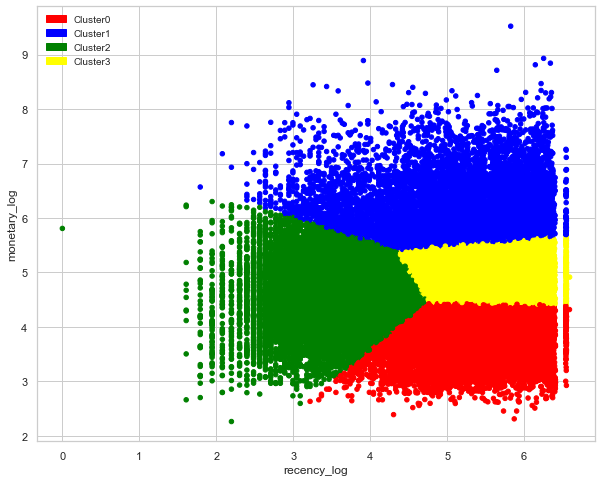

In [58]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs recency
Colors = ["red", "blue", "green", "yellow"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="monetary_log",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('outlier', xy=(340, 13650), xytext=(450, 13500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

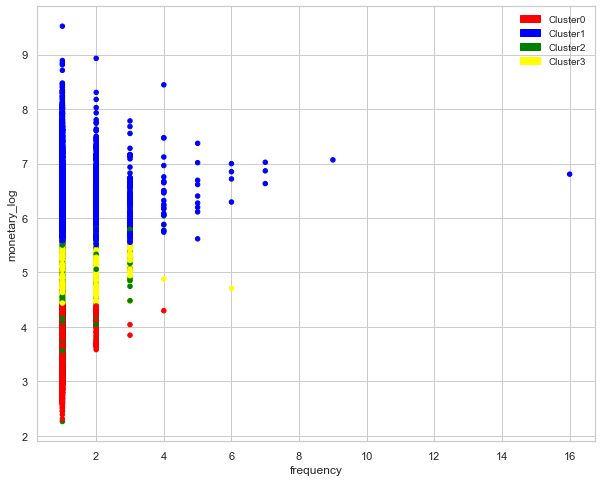

In [59]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs frequency
Colors = ["red", "blue", "green", "yellow"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="frequency", y="monetary_log",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
            arrowprops=dict(facecolor='black', shrink=0.1))

ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3'], markerscale=100, frameon=False, fontsize=10)

## 6.4 | Analyse des clusters issus de Kmeans - données RAM | Inertia

In [60]:
graph = pd.DataFrame(data=[KMean_clust.labels_]).T
graph.columns = ['label']

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster"}>

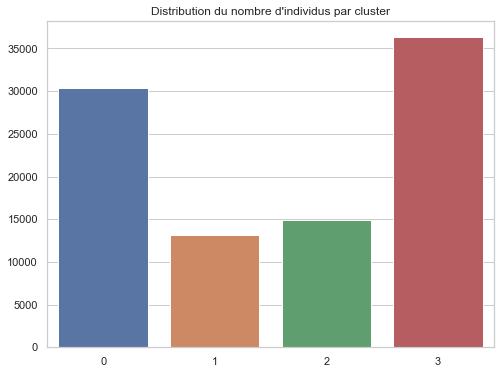

In [61]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster')
sns.barplot(x=graph['label'].value_counts().index,
            #            y=graph['label'].value_counts().values/len(graph)*100)
            y=graph['label'].value_counts().values)

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster, en pourcentage"}>

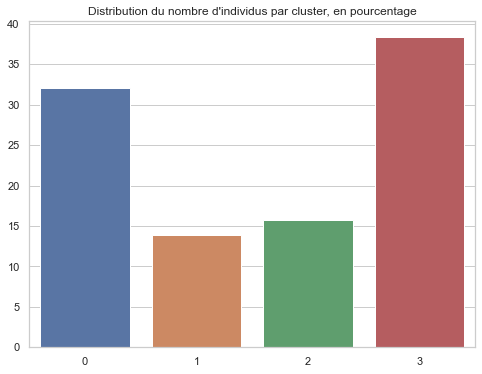

In [62]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x=graph['label'].value_counts().index,
            y=graph['label'].value_counts().values/len(graph)*100)

In [63]:
data.groupby(by='Cluster').agg(['min', 'max', 'mean', 'median'])

recency                         frequency                       \
            min  max        mean median       min max      mean median   
Cluster                                                                  
0            25  728  283.217552    267         1   4  1.004714      1   
1             6  699  241.548114    216         1  16  1.108905      1   
2             0  114   45.771432     41         1   4  1.025337      1   
3            77  729  291.761560    273         1   6  1.034338      1   

        monetary                                satisfaction                 \
             min       max        mean   median          min  max      mean   
Cluster                                                                       
0          10.07     84.85   52.672464   52.770          1.0  5.0  4.149903   
1         223.76  13664.08  536.683945  388.355          1.0  5.0  3.935382   
2           9.59    545.51  116.020902  100.700          1.0  5.0  4.286207   
3          81.90    286.55  146.989417  138.600          1.0  5.0  4.047836   

               nb_articles                        nb_diff_products       \
        median         min   max      mean median              min  max   
Cluster                                                                   
0          5.0         1.0   6.0  1.034369    1.0              1.0  3.0   
1          5.0         1.0  20.0  1.377600    1.0              1.0  8.0   
2          5.0         1.0   7.0  1.103358    1.0              1.0  7.0   
3          5.0         1.0  21.0  1.153053    1.0              1.0  6.0   

                         aver_basket                                  R      \
             mean median         min       max        mean   median min max   
Cluster                                                                       
0        1.008736    1.0   10.070000     84.85   52.518311   52.570   1   4   
1        1.088951    1.0   54.990000  13664.08  511.533227  371.320   1   4   
2        1.030263    1.0    9.590000    545.51  113.809760   98.650   4   4   
3        1.043983    1.0   18.453333    286.55  144.190879  136.005   1   4   

                           F                        M                       \
             mean median min max      mean median min max      mean median   
Cluster                                                                      
0        2.206837      2   1   4  1.013747      1   1   2  1.323575      1   
1        2.534596      3   1   4  1.269895      1   4   4  4.000000      4   
2        4.000000      4   1   4  1.071989      1   1   4  2.393123      2   
3        2.128004      2   1   4  1.098477      1   2   4  2.983835      3   

          S                      RSMScore                      recency_log  \
        min max      mean median      min max      mean median         min   
Cluster                                                                      
0         1   2  1.585369      2        3   8  5.115781      5       3.219   
1         1   2  1.548877      2        6  10  8.083473      8       1.792   
2         1   2  1.639319      2        6  10  8.032442      8       0.000   
3         1   2  1.562572      2        4  10  6.674410      7       4.344   

                                aver_basket_log                          \
           max      mean median             min    max      mean median   
Cluster                                                                   
0        6.590  5.515137  5.587           2.310  4.441  3.904832  3.966   
1        6.550  5.251218  5.375           5.411  9.523  6.118242  5.962   
2        4.736  3.650957  3.714           2.261  6.302  4.599225  4.612   
3        6.592  5.566136  5.609           4.405  5.658  4.943504  4.932   

        monetary_log                          
                 min    max      mean median  
Cluster                                       
0              2.310  4.441  3.904832  3.966  
1              5.411  9.523  6.118242  5.962  


In [64]:
print(data.monetary.max(),'est la valeur maximale pour le client',data.monetary.idxmax())

13664.08 est la valeur maximale pour le client 0a0a92112bd4c708ca5fde585afaa872


On constate que, mis à part ce maximum, d'autres valeurs élevées empêchent la bonne visualisation des boxplots. Je vais donc filtrer plus fortement sur les valeurs plus basses pour avoir un rendu visuel plus intéressant.

In [65]:
mask = data.monetary < 1000

In [66]:
graph = data[mask].loc[:, ['recency', 'aver_basket', 'monetary', 'Cluster']].groupby(by='Cluster')

Box plot par cluster et feature (hors valeurs monetary extrêmes)

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
3        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

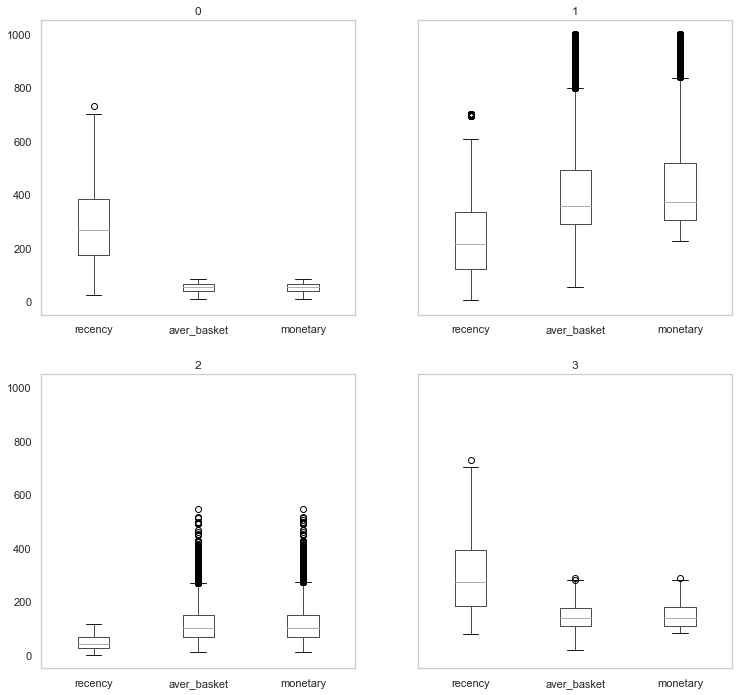

In [67]:
graph.boxplot(column=['recency', 'aver_basket',
              'monetary'], grid=False, figsize=(12, 12))

**Profils de clients par cluster :**

**Cluster 0 :** clients avec des **montants élevés** (médiane aver_basket 370 R$) et ayant **commandé pas récemment** (mediane recency 218j)

**Cluster 1 :** clients avec des **montants moyens** (médiane aver_basket 136 R$) et ayant **commandé pas récemment** (mediane recency 273j)

**Cluster 2 :** clients avec des **montants bas** (médiane aver_basket 85 R$) et ayant **commandé pas récemment** (mediane recency 266j)

**Cluster 3 :** clients avec des **montants bas** (médiane aver_basket 99 R$) et ayant **commandé récemment** (mediane recency 41j)

## 6.5 | Construction modèle Kmeans - données RAMS | Inertia

Effectuons maintenant un clustering sur la base des **3 critères précédents RAM** (recency, average basket, monetary), en ajoutant cette fois-ci **le "S" de satisfaction**.

In [68]:
# Let's build the kmeans model for a range of 15 k
# and measure its performance with the inertia metric

sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(Scaled_Data_RAMS)
    sum_of_sq_dist[k] = km.inertia_

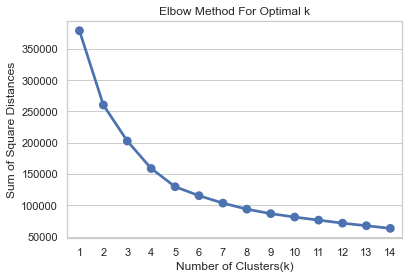

In [69]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This graph shows that **creating 5 clusters** seems to be the best compromise between **precision (square distance reduction)** and **cost efficiency (elbow of the curve)**.<br>
A **reduced number of clusters** will also allow a **better understanding** of the differences between clusters, hence a better **course of specific actions** on each cluster.

In [70]:
# Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters=5, init='k-means++', max_iter=1000)
KMean_clust.fit(Scaled_Data_RAMS)

# Find the clusters for the observation given in the dataset
data['Cluster'] = KMean_clust.labels_
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S RSMGroup  RSMScore  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2      423         9   
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6   
0000f46a3911fa3c0805444483337064  1  1  2  1      112         4   
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4   
0004aac84e0df4da2b147fca70cf8255  2  1  4  2      224         8   

                                 RSM_Loyalty_Level  recency_log  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          Platinum        4.754   
0000b849f77a49e4a4ce2b2a4ca5be3f            Silver        4.779   
0000f46a3911fa3c0805444483337064            Bronze        6.295   
0000f6ccb0745a6a4b88665a16c9f078            Bronze        5.787   
0004aac84e0df4da2b147fca70cf8255              Gold        5.680   

                                  aver_basket_log  monetary_log  Cluster  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            4.955         4.955        3   
0000b849f77a49e4a4ce2b2a4ca5be3f            3.303         3.303        1   
0000f46a3911fa3c0805444483337064            4.457         4.457        4   
0000f6ccb0745a6a4b88665a16c9f078            3.776         3.776        1   
0004aac84e0df4da2b147fca70cf8255            5.283         5.283        3   

                                   color  
customer_unique_id                        
0000366f3b9a7992bf8c76cfdf3221e2  yellow  
0000b849f77a49e4a4ce2b2a4ca5be3f     red  
0000f46a3911fa3c0805444483337064  yellow  
0000f6ccb0745a6a4b88665a16c9f078     red  
0004aac84e0df4da2b147fca70cf8255  yellow

In [71]:
data.Cluster.unique()

array([3, 1, 4, 0, 2])

<Figure size 504x504 with 0 Axes>

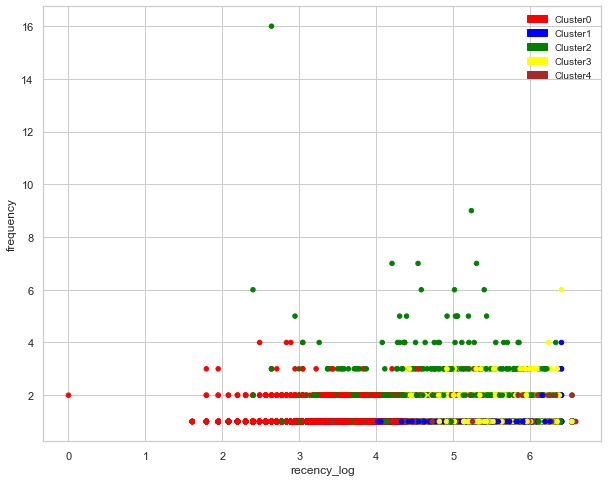

In [72]:
import matplotlib
plt.figure(figsize=(7, 7))

# Scatter Plot frequency Vs recency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="frequency",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('outlier', xy=(25, 16), xytext=(100, 15),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

We verify that **Cluster 0** is correctly identified with **red color** in the graph :

In [73]:
data[(data['Cluster'] == 0) & (data['color'] != 'red')]

Empty DataFrame
Columns: [recency, frequency, monetary, satisfaction, nb_articles, nb_diff_products, day_last_purch, aver_basket, aver_basket_cat, R, F, M, S, RSMGroup, RSMScore, RSM_Loyalty_Level, recency_log, aver_basket_log, monetary_log, Cluster, color]
Index: []

<Figure size 504x504 with 0 Axes>

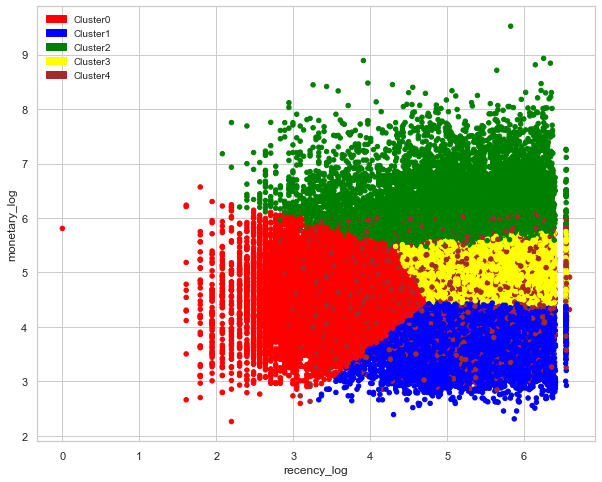

In [74]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs recency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="monetary_log",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('outlier', xy=(340, 13650), xytext=(450, 13500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

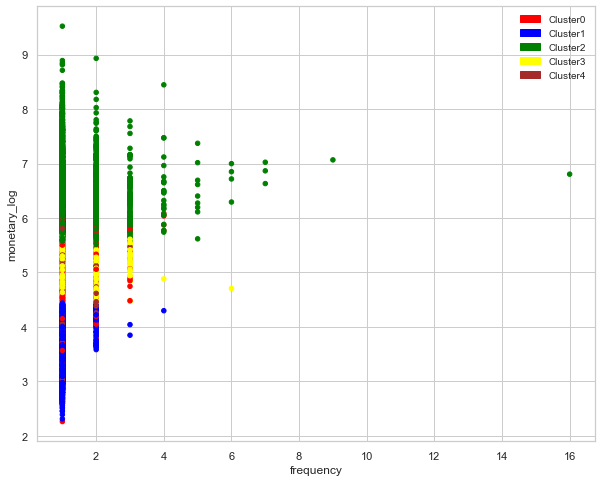

In [75]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs frequency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="frequency", y="monetary_log",
    figsize=(10, 8),
    c=data["color"],
)

ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
            arrowprops=dict(facecolor='black', shrink=0.1))

ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

## 6.6 | Analyse des clusters issus de Kmeans - données RAMS | Inertia

In [76]:
graph = pd.DataFrame(data=[KMean_clust.labels_]).T
graph.columns = ['label']

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster"}>

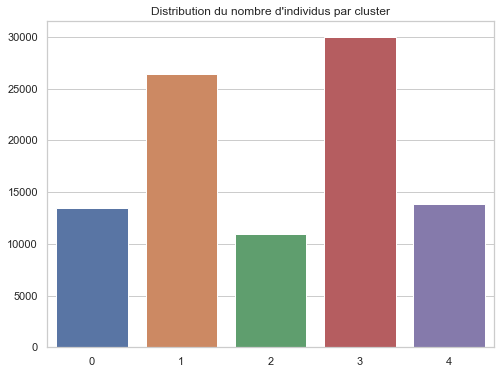

In [77]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster')
sns.barplot(x=graph['label'].value_counts().index,
            #            y=graph['label'].value_counts().values/len(graph)*100)
            y=graph['label'].value_counts().values)

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster, en pourcentage"}>

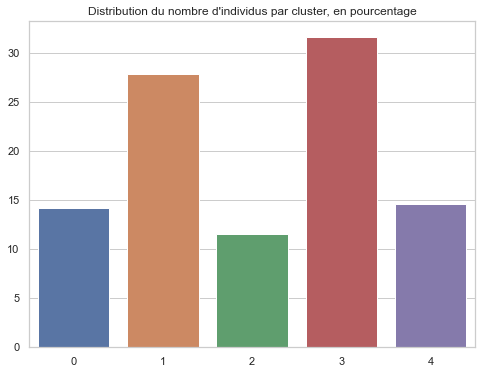

In [78]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x=graph['label'].value_counts().index,
            y=graph['label'].value_counts().values/len(graph)*100)

In [79]:
data.groupby(by='Cluster').agg(['min', 'max', 'mean', 'median'])

recency                         frequency                       \
            min  max        mean median       min max      mean median   
Cluster                                                                  
0             0  114   44.407289     40         1   4  1.027093      1   
1            28  700  283.547561    269         1   4  1.004915      1   
2             8  699  239.570489    214         1  16  1.118502      1   
3            73  700  294.508527    277         1   6  1.038239      1   
4            16  729  252.125371    224         1   3  1.018509      1   

        monetary                                satisfaction                 \
             min       max        mean   median          min  max      mean   
Cluster                                                                       
0           9.59    712.90  116.669138  101.320         1.00  5.0  4.583018   
1          10.07     86.44   52.130850   51.845         1.00  5.0  4.575671   
2         220.04  13664.08  584.162104  430.670         1.00  5.0  4.132006   
3          82.08    319.09  152.417974  143.320         2.75  5.0  4.665866   
4          13.89    430.67  128.869066  107.850         1.00  3.0  1.483509   

               nb_articles                        nb_diff_products       \
        median         min   max      mean median              min  max   
Cluster                                                                   
0          5.0         1.0   6.0  1.092154    1.0              1.0  6.0   
1          5.0         1.0   6.0  1.029112    1.0              1.0  3.0   
2          5.0         1.0  20.0  1.371003    1.0              1.0  8.0   
3          5.0         1.0   6.0  1.131920    1.0              1.0  6.0   
4          1.0         1.0  21.0  1.221483    1.0              1.0  7.0   

                         aver_basket                                 R      \
             mean median         min       max        mean  median min max   
Cluster                                                                      
0        1.026462    1.0    9.590000    712.90  114.278238   98.88   4   4   
1        1.006919    1.0   10.070000     86.44   51.970690   51.72   1   4   
2        1.082357    1.0   54.990000  13664.08  555.665950  411.33   1   4   
3        1.034436    1.0   18.453333    319.09  149.184025  139.28   1   4   
4        1.072759    1.0   13.890000    430.67  127.180467  106.78   1   4   

                           F                        M                       \
             mean median min max      mean median min max      mean median   
Cluster                                                                      
0        4.000000      4   1   4  1.076603      1   1   4  2.398233      2   
1        2.203819      2   1   4  1.014291      1   1   2  1.310170      1   
2        2.550571      3   1   4  1.290818      1   4   4  4.000000      4   
3        2.107921      2   1   4  1.108620      1   2   4  3.038505      3   
4        2.445882      3   1   4  1.054443      1   1   4  2.515798      2   

          S                      RSMScore                      recency_log  \
        min max      mean median      min max      mean median         min   
Cluster                                                                      
0         1   2  1.702717      2        6  10  8.100950      8       0.000   
1         1   2  1.674178      2        3   8  5.188166      5       3.332   
2         1   2  1.565190      2        6  10  8.115761      8       2.079   
3         1   2  1.714776      2        4  10  6.861202      7       4.290   
4         1   1  1.000000      1        3   9  5.961680      6       2.773   

                                aver_basket_log                          \
           max      mean median             min    max      mean median   
Cluster                                                                   
0        4.736  3.618594  3.689           2.261  6.569  4.601823  4.618   
1     

In [80]:
print(data.monetary.max(),'est la valeur maximale pour le client',data.monetary.idxmax())

13664.08 est la valeur maximale pour le client 0a0a92112bd4c708ca5fde585afaa872


On constate que, mis à part ce maximum, d'autres valeurs élevées empêchent la bonne visualisation des boxplots. Je vais donc filtrer plus fortement sur les valeurs plus basses pour avoir un rendu visuel plus intéressant.

In [81]:
mask = data.monetary < 1000

In [82]:
graph = data[mask].loc[:, ['recency', 'aver_basket', 'monetary', 'Cluster']].groupby(by='Cluster')

Box plot par cluster et feature (hors valeurs monetary extrêmes)

0         AxesSubplot(0.1,0.679412;0.363636x0.220588)
1    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2         AxesSubplot(0.1,0.414706;0.363636x0.220588)
3    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
4             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

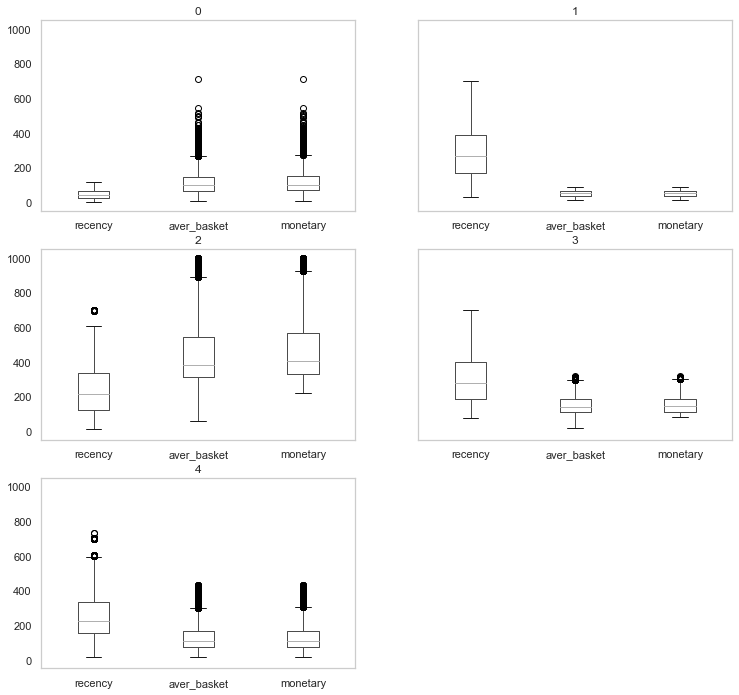

In [83]:
graph.boxplot(column=['recency', 'aver_basket',
              'monetary'], grid=False, figsize=(12, 12))

**Profils de clients par cluster :**

**Cluster 0 :** clients avec des **montants moyens à bas** (médiane aver_basket 114 R$) et ayant commandé **récemment** (mediane recency 40j)

**Cluster 1 :** clients avec des **montants bas** (médiane aver_basket 52 R$) et ayant commandé **pas récemment** (mediane recency 269j)

**Cluster 2 :** clients avec des **montants élevés** (médiane aver_basket 411 R$) et ayant commandé **pas récemment** (mediane recency 214j)

**Cluster 3 :** clients avec des **montants moyens** (médiane aver_basket 139 R$) et ayant commandé **pas récemment** (mediane recency 277j)

**Cluster 4 :** clients avec des **montants moyens à bas** (médiane aver_basket 127 R$) et ayant commandé **pas récemment** (mediane recency 224j)

In [84]:
data.groupby(by='Cluster').agg(['min', 'max', 'mean', 'median'])

recency                         frequency                       \
            min  max        mean median       min max      mean median   
Cluster                                                                  
0             0  114   44.407289     40         1   4  1.027093      1   
1            28  700  283.547561    269         1   4  1.004915      1   
2             8  699  239.570489    214         1  16  1.118502      1   
3            73  700  294.508527    277         1   6  1.038239      1   
4            16  729  252.125371    224         1   3  1.018509      1   

        monetary                                satisfaction                 \
             min       max        mean   median          min  max      mean   
Cluster                                                                       
0           9.59    712.90  116.669138  101.320         1.00  5.0  4.583018   
1          10.07     86.44   52.130850   51.845         1.00  5.0  4.575671   
2         220.04  13664.08  584.162104  430.670         1.00  5.0  4.132006   
3          82.08    319.09  152.417974  143.320         2.75  5.0  4.665866   
4          13.89    430.67  128.869066  107.850         1.00  3.0  1.483509   

               nb_articles                        nb_diff_products       \
        median         min   max      mean median              min  max   
Cluster                                                                   
0          5.0         1.0   6.0  1.092154    1.0              1.0  6.0   
1          5.0         1.0   6.0  1.029112    1.0              1.0  3.0   
2          5.0         1.0  20.0  1.371003    1.0              1.0  8.0   
3          5.0         1.0   6.0  1.131920    1.0              1.0  6.0   
4          1.0         1.0  21.0  1.221483    1.0              1.0  7.0   

                         aver_basket                                 R      \
             mean median         min       max        mean  median min max   
Cluster                                                                      
0        1.026462    1.0    9.590000    712.90  114.278238   98.88   4   4   
1        1.006919    1.0   10.070000     86.44   51.970690   51.72   1   4   
2        1.082357    1.0   54.990000  13664.08  555.665950  411.33   1   4   
3        1.034436    1.0   18.453333    319.09  149.184025  139.28   1   4   
4        1.072759    1.0   13.890000    430.67  127.180467  106.78   1   4   

                           F                        M                       \
             mean median min max      mean median min max      mean median   
Cluster                                                                      
0        4.000000      4   1   4  1.076603      1   1   4  2.398233      2   
1        2.203819      2   1   4  1.014291      1   1   2  1.310170      1   
2        2.550571      3   1   4  1.290818      1   4   4  4.000000      4   
3        2.107921      2   1   4  1.108620      1   2   4  3.038505      3   
4        2.445882      3   1   4  1.054443      1   1   4  2.515798      2   

          S                      RSMScore                      recency_log  \
        min max      mean median      min max      mean median         min   
Cluster                                                                      
0         1   2  1.702717      2        6  10  8.100950      8       0.000   
1         1   2  1.674178      2        3   8  5.188166      5       3.332   
2         1   2  1.565190      2        6  10  8.115761      8       2.079   
3         1   2  1.714776      2        4  10  6.861202      7       4.290   
4         1   1  1.000000      1        3   9  5.961680      6       2.773   

                                aver_basket_log                          \
           max      mean median             min    max      mean median   
Cluster                                                                   
0        4.736  3.618594  3.689           2.261  6.569  4.601823  4.618   
1     

## 6.7 | Construction modèle Kmeans - données RAMS  | Silhouette score

In [85]:
X = Scaled_Data_RAMS.values

X est déjà normalisé (avec Standard Scaler), nous n'avons donc pas besoin de réaliser cette étape à nouveau ici.

In [86]:
print(X.shape)

(94720, 4)


Je vais maintenant faire un clustering k-means pour plusieurs tailles de cluster. Pour chacune de ces tailles je vais calculer un **coefficient de silhouette** pour pouvoir choisir ensuite la taille la plus appropriée.

Pour chaque numéro de clusters, je crée les clusters avec une 
initialisation aléatoire et unique.

Je ferai ensuite la clusterisation sur les données normalisées et calculerai le coefficient de silhouette sur les données étant donné le clustering fourni par cls.

J'afficherai ensuite ces valeurs de coefficient silhouette pour toutes les valeurs de nombre de cluster.

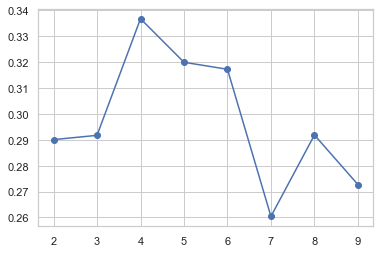

In [87]:
# j'importe un module pour faire du clustering
# et un pour calculer le coefficient de silhouette
from sklearn import cluster, metrics

silhouettes = []

for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=1, init='random')

    cls.fit(X)
    silh = metrics.silhouette_score(X, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

**Résultat** : on constate que le coefficient de silhouette évolue avec le nombre de clusters, est le plus haut à 4 et diminue à partir de 6.

**Conclusion** : ce graphe indique qu'il faut privilégier 4 ou 5 clusters, les valeurs pour lesquelles le coefficient de silhouette est le plus élevé.

Pour regarder à quoi ressemble les clusters, j'utilise une ACP pour projeter les données sur 3 dimensions. J'utilise pour cela le module décomposition de scikit-learn.

In [88]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X)

[0.50158126 0.7618844 ]


J'ai affiché le pourcentage de variance expliquée par la première composante et par les deux premières composantes cumulées.

On a donc près de 76% de la variance totale qui sont expliquées par ces 2 premières composantes.

Il est donc possible d'utiliser ces deux premières composantes pour représenter les données.

J'affiche les données projetées selon ces deux dimensions, colorées selon le cluster auquel elles appartiennent, pour 4 et 5 clusters.

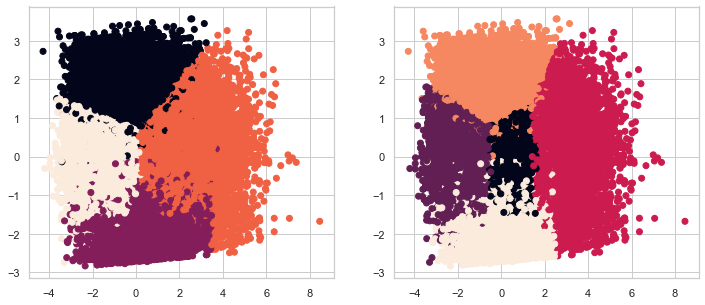

In [89]:
# je crée une figure
fig = plt.figure(figsize=(12, 5))

# pour 4 clusters
# je fit mon clustering avec les données normalisées
cls = cluster.KMeans(n_clusters=4)
cls.fit(X)

# je crée une sous-figure,
# je mets les 2 figures côte à côte.
# 1 ss-fig en ordonnée
# 2 fig n côte à côte en horizontal

ax = fig.add_subplot(121)
# première figure (projection selon composante 1 et 2)
# je colore selon les labels du clustering cls
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)

# on renouvelle l'opération pur 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X)
ax = fig.add_subplot(122)  # sur la 2e sous-figure
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls5.labels_)

**Note :** On observe qu'en passant de 4 clusters à gauche à 5 clusters à droite, la partie centrale de la population du graphe forme maintenant le cinquième cluster.

## 6.8 | Analyse des clusters issus de Kmeans - données RAMS | Silhouette score

Réalisons l'analyse des diagrammes de silhouette score pour l'étude des clusters selon le nombre k de clusters.

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 8)]

In [92]:
silhouette_scores = [silhouette_score(
    X, model.labels_) for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


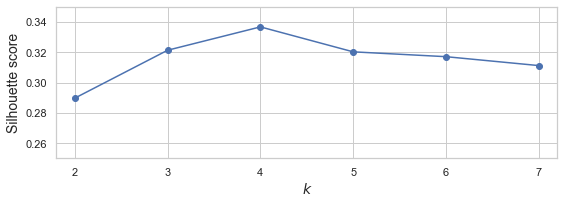

In [93]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 7.2, 0.25, 0.35])
save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that k=4 is a very good choice, but it also underlines the fact that k=5 is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

Saving figure silhouette_analysis_plot


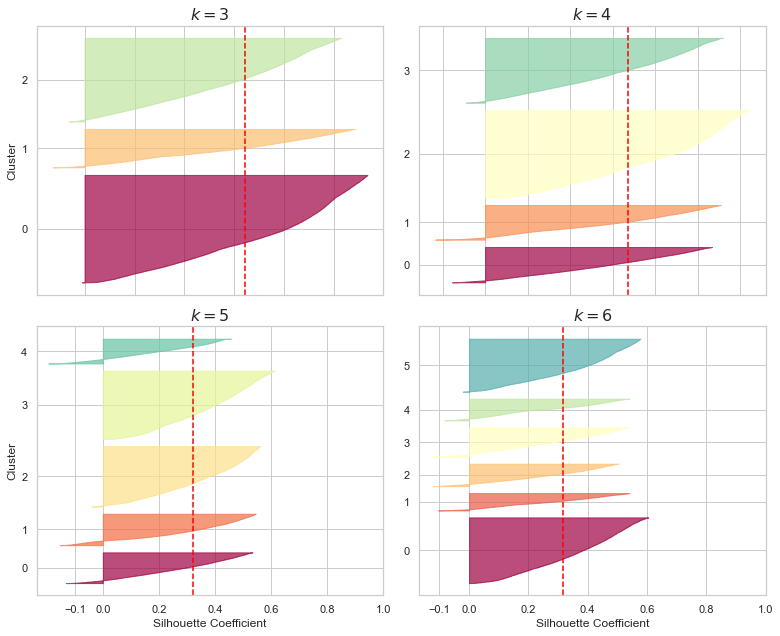

In [94]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

**Elbow Method**

K-Means is a simple unsupervised machine learning algorithm that groups data into the number  K  of clusters specified by the user, even if it is not the optimal number of clusters for the dataset.

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for  K . If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the KElbowVisualizer fits the model for a range of  K  values from 4 to 11, which is set by the parameter k=(4,12). When the model is fit with 5 clusters we can see an slight "elbow" in the graph.

In [95]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [96]:
mpl.rcParams["figure.figsize"] = (9, 6)

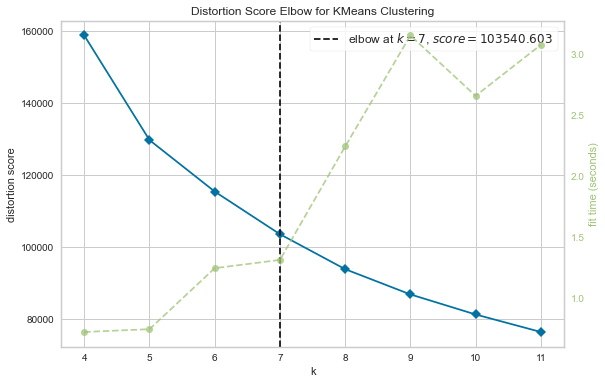

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer—silhouette and calinski_harabaz. The silhouette score is the mean silhouette coefficient for all samples, while the calinski_harabaz score computes the ratio of dispersion between and within clusters.

The KElbowVisualizer also displays the amount of time to fit the model per  K , which can be hidden by setting timings=False. In the following example, we'll use the calinski_harabaz score and hide the time to fit the model.

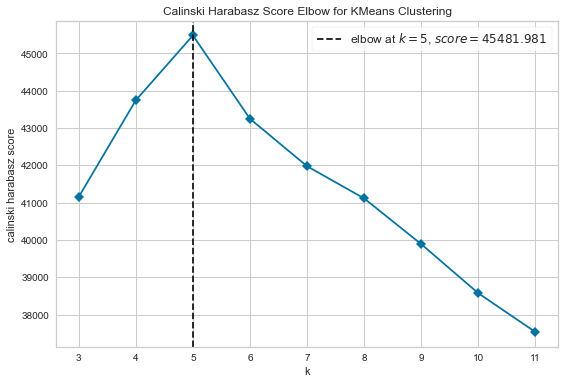

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [98]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3, 12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)
visualizer.poof()

It is important to remember that the Elbow method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of  K  will be unclear.

**Silhouette Visualizer**

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The SilhouetteVisualizer displays the silhouette coefficient for each sample on a per-cluster basis, allowing users to visualize the density and separation of the clusters. This is particularly useful for determining cluster imbalance or for selecting a value for  K  by comparing multiple visualizers.

Since we analyzed the sample dataset, we already have a clue that the data points might be grouped into 5 clusters. So for the first SilhouetteVisualizer example, we'll set K to 5 in order to show how the plot looks when using the optimal value of K.

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

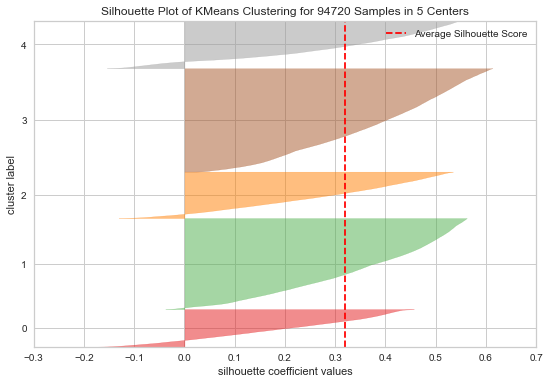

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 94720 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [99]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

# 7 | K-Means Clustering - features étendus RAMS_ext

Nous allons maintenant tester le modèle K-means avec **6 features**, pour voir s'il y a un intérêt d'ajouter des features en vue d'une clusterisation plus satisfaisante. Nous ajoutons aux **4 critères RAMS** :
-  la **moyenne du nombre d'articles par commande**, ainsi que 
-  la **moyenne du nombre de produits différents**.

Je l'avais déjà préparé au **point 6.2** et l'avais nommé **Scaled_Data_RAMS_ext** (pour extended).

Les données qu'il contient sont **déjà log-transformées et standardisées**. Il s'agit juste d'une sélection plus large de features.

Nous ferons le test et l'analyse des clusters uniquement sur base de la mesure d'inertie, pous raisons de temps de calcul. Nous pourrons déjà conclure sur base de ces données sur l'intérêt d'ajouter ces features.  

## 7.1 | Distribution des 2 nouvelles features | 'nb_articles' + 'nb_diff_products'

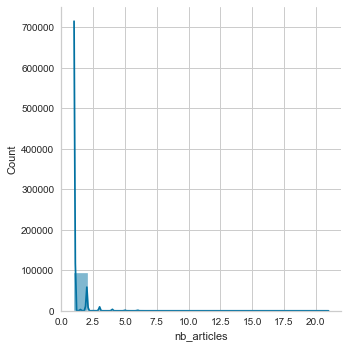

In [100]:
# Data distribution after data normalization for nb_products
Nb_articles_Plot = data['nb_articles']
ax = sns.displot(Nb_articles_Plot, kde=True)

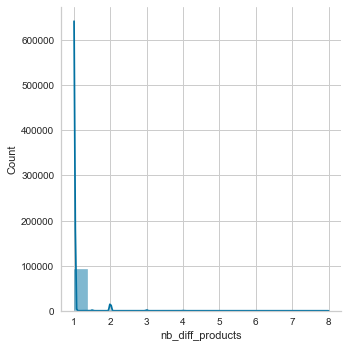

In [101]:
# Data distribution after data normalization for nb_products
Nb_diff_products_Plot = data['nb_diff_products']
ax = sns.displot(Nb_diff_products_Plot, kde=True)

## 7.2 | Construction modèle Kmeans | RAMS_ext - inertia score

In [102]:
# Let's build the kmeans model for a range of 15 k
# and measure its performance with the inertia metric

sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(Scaled_Data_RAMS_ext)
    sum_of_sq_dist[k] = km.inertia_

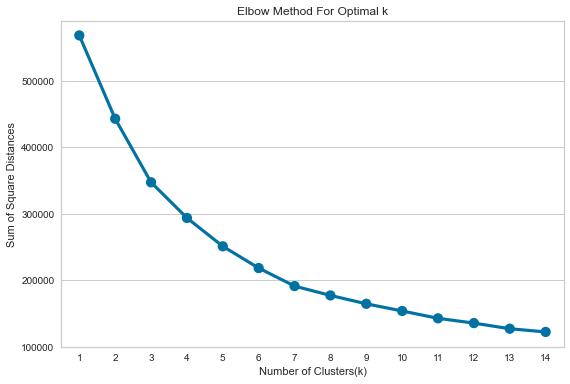

In [103]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

No real elbow here, adding more feature does not help to find more satisfying clusters.

This graph shows that **creating 5 clusters** seems to be the best compromise between **precision (square distance reduction)**, **cost efficiency (near the elbow of the curve)**, and **ability to operate** upon them.<br>

A **reduced number of clusters** will also allow a **better understanding** of the differences between clusters, hence a better **course of specific actions** on each cluster.

In [104]:
# Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters=5, init='k-means++', max_iter=1000)
KMean_clust.fit(Scaled_Data_RAMS_ext)

# Find the clusters for the observation given in the dataset
data['Cluster'] = KMean_clust.labels_
data.head()

recency  frequency  monetary  satisfaction  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      116          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      542          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      326          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      293          1    196.89           5.0   

                                  nb_articles  nb_diff_products  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          1.0               1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0               1.0   
0000f46a3911fa3c0805444483337064          1.0               1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0               1.0   
0004aac84e0df4da2b147fca70cf8255          1.0               1.0   

                                 day_last_purch  aver_basket aver_basket_cat  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       Thursday       141.90         100-500   
0000b849f77a49e4a4ce2b2a4ca5be3f         Monday        27.19           10-50   
0000f46a3911fa3c0805444483337064         Friday        86.22          50-100   
0000f6ccb0745a6a4b88665a16c9f078       Thursday        43.62           10-50   
0004aac84e0df4da2b147fca70cf8255        Tuesday       196.89         100-500   

                                  R  F  M  S RSMGroup  RSMScore  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2  4  1  3  2      423         9   
0000b849f77a49e4a4ce2b2a4ca5be3f  4  1  1  1      411         6   
0000f46a3911fa3c0805444483337064  1  1  2  1      112         4   
0000f6ccb0745a6a4b88665a16c9f078  2  1  1  1      211         4   
0004aac84e0df4da2b147fca70cf8255  2  1  4  2      224         8   

                                 RSM_Loyalty_Level  recency_log  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2          Platinum        4.754   
0000b849f77a49e4a4ce2b2a4ca5be3f            Silver        4.779   
0000f46a3911fa3c0805444483337064            Bronze        6.295   
0000f6ccb0745a6a4b88665a16c9f078            Bronze        5.787   
0004aac84e0df4da2b147fca70cf8255              Gold        5.680   

                                  aver_basket_log  monetary_log  Cluster  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            4.955         4.955        1   
0000b849f77a49e4a4ce2b2a4ca5be3f            3.303         3.303        0   
0000f46a3911fa3c0805444483337064            4.457         4.457        0   
0000f6ccb0745a6a4b88665a16c9f078            3.776         3.776        0   
0004aac84e0df4da2b147fca70cf8255            5.283         5.283        1   

                                   color  
customer_unique_id                        
0000366f3b9a7992bf8c76cfdf3221e2  yellow  
0000b849f77a49e4a4ce2b2a4ca5be3f    blue  
0000f46a3911fa3c0805444483337064   brown  
0000f6ccb0745a6a4b88665a16c9f078    blue  
0004aac84e0df4da2b147fca70cf8255  yellow

In [105]:
data.Cluster.describe()

count    94720.000000
mean         1.403463
std          1.487907
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          4.000000
Name: Cluster, dtype: float64

<Figure size 504x504 with 0 Axes>

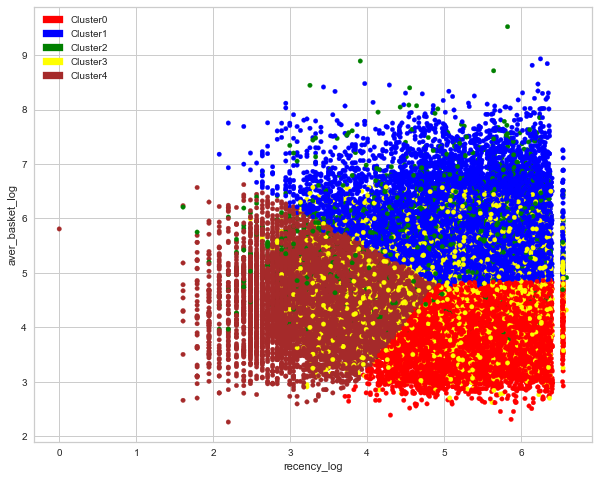

In [106]:
plt.figure(figsize=(7, 7))

# Scatter Plot aver_basket Vs recency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="aver_basket_log",
    figsize=(10, 8),
    c=data['color'],
)

ax.annotate('outlier', xy=(25, 16), xytext=(100, 15),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

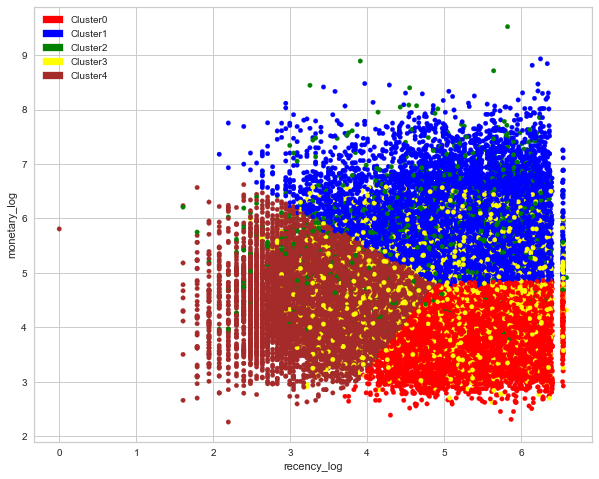

In [107]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs recency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="recency_log", y="monetary_log",
    figsize=(10, 8),
    c=data['color'],
)

ax.annotate('monetary outlier', xy=(340, 13650), xytext=(450, 13500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

Créer un graphe 3D (attention à la mémoire)

<Figure size 504x504 with 0 Axes>

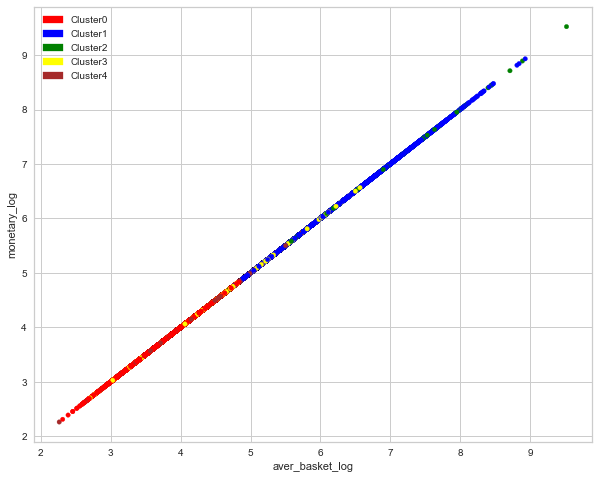

In [108]:
plt.figure(figsize=(7, 7))

# Scatter Plot monetary Vs frequency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="aver_basket_log", y="monetary_log",
    figsize=(10, 8),
    c=data['color'],
)

ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
            arrowprops=dict(facecolor='black', shrink=0.1))

ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
            arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

Comme prévu, ce graphe confirme la corrélation quasi parfaite entre monetary et average_basket, du fait du nombre d'article majoritaire, à savoir 1.

<Figure size 504x504 with 0 Axes>

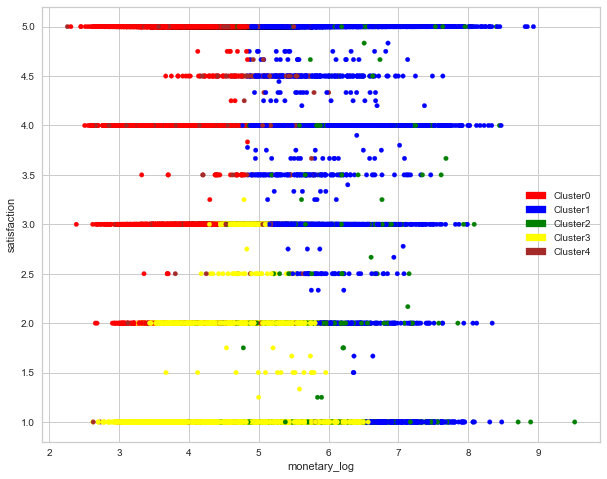

In [109]:
plt.figure(figsize=(7, 7))

# Scatter Plot satisfaction Vs monetary
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="monetary_log", y="satisfaction",
    figsize=(10, 8),
    c=data['color'],
)

# ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
#             arrowprops=dict(facecolor='black', shrink=0.1))

# ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
#             arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

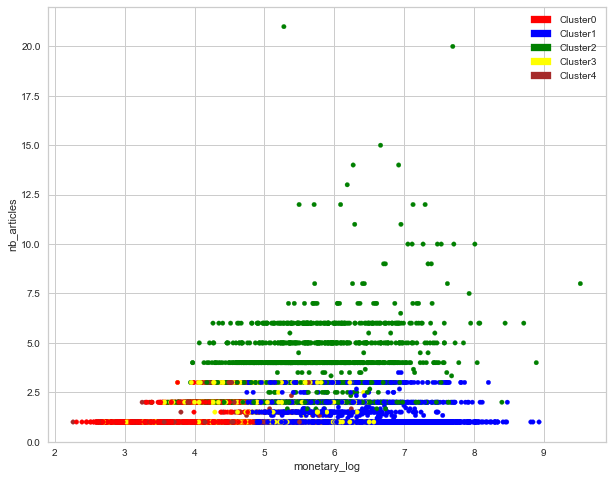

In [110]:
plt.figure(figsize=(7, 7))

# Scatter Plot nb_articles Vs monetary
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="monetary_log", y="nb_articles",
    figsize=(10, 8),
    c=data['color'],
)

# ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
#             arrowprops=dict(facecolor='black', shrink=0.1))

# ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
#             arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

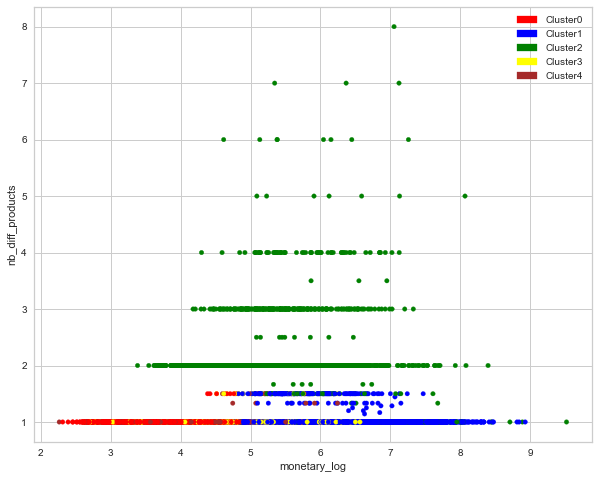

In [111]:
plt.figure(figsize=(7, 7))

# Scatter Plot nb_diff_products Vs monetary
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="monetary_log", y="nb_diff_products",
    figsize=(10, 8),
    c=data['color'],
)

# ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
#             arrowprops=dict(facecolor='black', shrink=0.1))

# ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
#             arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

<Figure size 504x504 with 0 Axes>

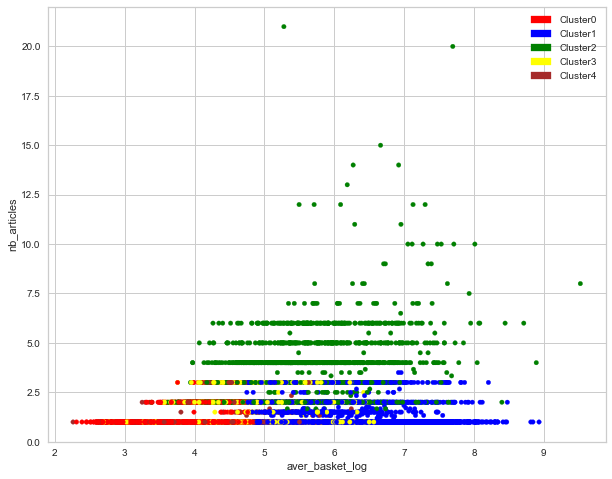

In [112]:
plt.figure(figsize=(7, 7))

# Scatter Plot nb_products Vs frequency
Colors = ["red", "blue", "green", "yellow", "brown"]
data["color"] = data['Cluster'].map(lambda p: Colors[p])
ax = data.plot(
    kind="scatter",
    x="aver_basket_log", y="nb_articles",
    figsize=(10, 8),
    c=data['color'],
)

# ax.annotate('monetary outlier', xy=(1, 13650), xytext=(3, 13000),
#             arrowprops=dict(facecolor='black', shrink=0.1))

# ax.annotate('frequency outlier', xy=(15.5, 1000), xytext=(11, 1500),
#             arrowprops=dict(facecolor='black', shrink=0.1))

redPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='red')
bluePatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='blue')
greenPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='green')
yellowPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='yellow')
brownPatch = matplotlib.patches.Rectangle((0, 0), 0, 0, color='brown')

plt.legend([redPatch, bluePatch, greenPatch, yellowPatch, brownPatch], [
           'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], markerscale=100, frameon=False, fontsize=10)

## 7.3 | Analyse des clusters issus de Kmeans - inertia score

In [113]:
graph = pd.DataFrame(data=[KMean_clust.labels_]).T
graph.columns = ['label']

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster"}>

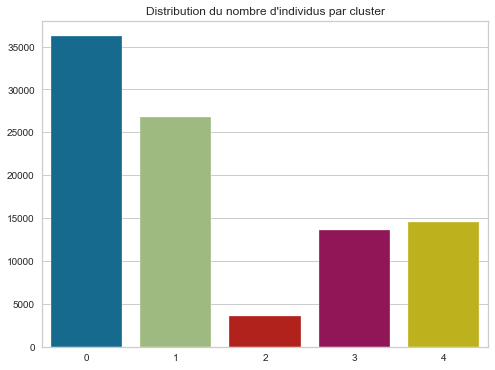

In [114]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster')
sns.barplot(x=graph['label'].value_counts().index,
            #            y=graph['label'].value_counts().values/len(graph)*100)
            y=graph['label'].value_counts().values)

<AxesSubplot:title={'center':"Distribution du nombre d'individus par cluster, en pourcentage"}>

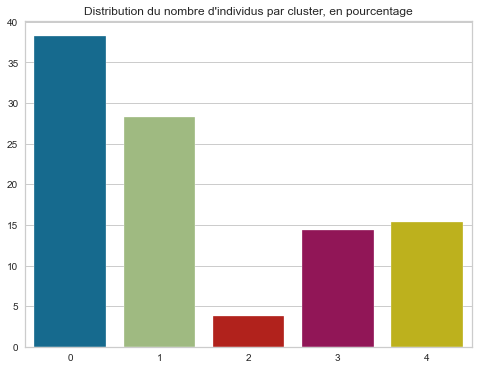

In [115]:
plt.figure(figsize=(8, 6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x=graph['label'].value_counts().index,
            y=graph['label'].value_counts().values/len(graph)*100)

Ajouter colonne cluster dans matrice RFM
Group By par cluster, boxplot

In [116]:
data.groupby(by='Cluster').agg(['min', 'max', 'mean', 'median'])

recency                         frequency                       \
            min  max        mean median       min max      mean median   
Cluster                                                                  
0            41  700  295.247460    278         1   6  1.009581      1   
1             8  700  271.527893    256         1  16  1.076113      1   
2             5  729  243.358296    228         1   4  1.041203      1   
3            12  728  256.785037    229         1   3  1.019843      1   
4             0  134   49.598955     42         1   4  1.027094      1   

        monetary                                satisfaction                  \
             min       max        mean   median          min   max      mean   
Cluster                                                                        
0          10.07    130.10   66.868342   64.000          2.0  5.00  4.613921   
1         109.14   7571.63  323.619477  214.560          1.0  5.00  4.558232   
2          29.42  13664.08  299.824195  209.125          1.0  5.00  3.345328   
3          13.78    737.36  139.260704  112.920          1.0  3.25  1.517926   
4           9.59    751.17  113.322890  101.270          1.0  5.00  4.595671   

               nb_articles                        nb_diff_products       \
        median         min   max      mean median              min  max   
Cluster                                                                   
0          5.0    1.000000   3.0  1.026135    1.0              1.0  1.5   
1          5.0    1.000000   3.5  1.118526    1.0              1.0  1.5   
2          4.0    1.666667  21.0  2.828090    2.0              1.0  8.0   
3          1.0    1.000000   3.0  1.121506    1.0              1.0  1.5   
4          5.0    1.000000   3.0  1.052090    1.0              1.0  1.5   

                         aver_basket                                 R      \
             mean median         min       max        mean  median min max   
Cluster                                                                      
0        1.000110    1.0       10.07    129.98   66.441439   63.34   1   4   
1        1.002991    1.0       32.95   6929.31  310.467167  206.74   1   4   
2        1.941258    2.0       29.42  13664.08  288.378754  204.06   1   4   
3        1.000686    1.0       13.78    737.36  137.364379  111.02   1   4   
4        1.000458    1.0        9.59    751.17  110.956629   99.37   3   4   

                           F                        M                       \
             mean median min max      mean median min max      mean median   
Cluster                                                                      
0        2.102827      2   1   4  1.027667      1   1   3  1.616192      2   
1        2.289392      2   1   4  1.198184      1   3   4  3.638867      4   
2        2.503341      2   1   4  1.111080      1   1   4  3.373608      4   
3        2.414566      2   1   4  1.058426      1   1   4  2.541119      3   
4        3.983909      4   1   4  1.076124      1   1   4  2.348164      2   

          S                      RSMScore                      recency_log  \
        min max      mean median      min max      mean median         min   
Cluster                                                                      
0         1   2  1.689115      2        3   8  5.408135      5       3.714   
1         1   2  1.682173      2        5  10  7.610432      8       2.079   
2         1   2  1.408408      1        3  10  7.285356      7       1.609   
3         1   1  1.000000      1        3   9  5.955685      6       2.485   
4         1   2  1.705749      2        6  10  8.037821      8       0.000   

                                aver_basket_log                          \
           max      mean median             min    max      mean median   
Cluster                                                                   
0        6.551  5.573628  5.628           2.310  4.868  4.107257  4.159  

In [117]:
print(data.monetary.max(),'est la valeur maximale pour le client',data.monetary.idxmax())

13664.08 est la valeur maximale pour le client 0a0a92112bd4c708ca5fde585afaa872


On constate que, mis à part ce maximum, d'autres valeurs élevées empêchent la bonne visualisation des boxplots. Je vais donc filtrer plus fortement sur les valeurs plus basses pour avoir un rendu visuel plus intéressant.

In [118]:
mask = data.monetary < 1000

In [119]:
graph = data[mask].loc[:, ['recency', 'aver_basket', 'monetary', 'Cluster']].groupby(by='Cluster')

Box plot par cluster et feature (hors valeurs monetary extrêmes)

0         AxesSubplot(0.1,0.679412;0.363636x0.220588)
1    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2         AxesSubplot(0.1,0.414706;0.363636x0.220588)
3    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
4             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

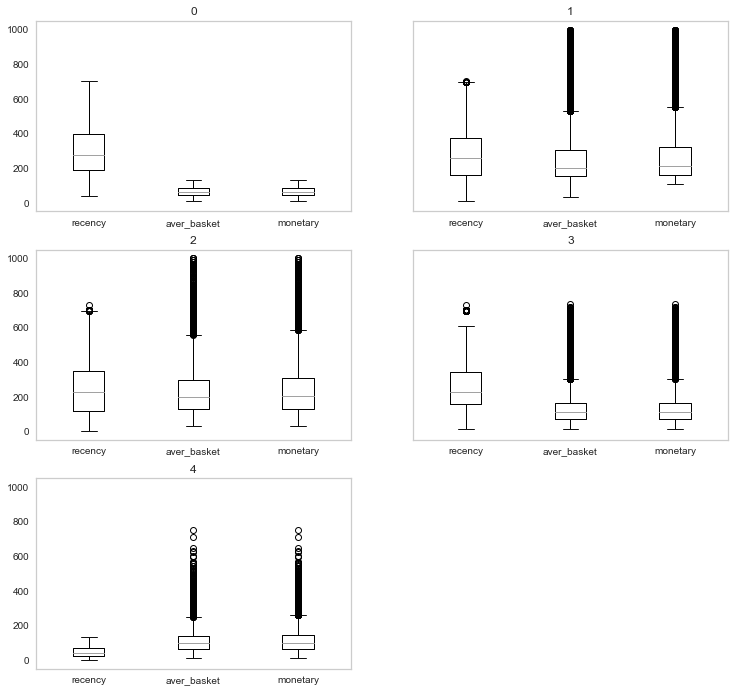

In [120]:
graph.boxplot(column=['recency', 'aver_basket',
              'monetary'], grid=False, figsize=(12, 12))

**Profils de clients par cluster :**

**Cluster 0 :** clients avec des **montants bas à moyens** (médiane aver_basket 111 R$) et ayant **commandé récemment** (mediane recency 43j)

**Cluster 1 :** clients avec des **montants bas** (médiane aver_basket 64 R$) et ayant **commandé pas récemment** (mediane recency 278j)

**Cluster 2 :** clients avec des **montants moyens à élevés** (médiane aver_basket 207 R$) et ayant **commandé pas récemment** (mediane recency 257j)

**Cluster 3 :** clients avec des **montants moyens à élevés** (médiane aver_basket 204 R$) et ayant **commandé pas récemment** (mediane recency 228j)

**Cluster 4 :** clients avec des **montants bas à moyens** (médiane aver_basket 111 R$) et ayant **commandé pas récemment** (mediane recency 229j)

# 8 | DBScan Clustering - features étendus RFM + 2 autres

### 8.1 | Principe

DBSCAN signifie : Density-Based Spatial Clustering of Applications with Noise.

Cet algorithme forme des clusters de points connectés par densité, à l'intérieur de régions continues de haute densité.

Cet algorithme est particulièrement adapté pour former des clusters non convexes, comme des demi-lunes, des cercles imbriqués. Voyons s'il est adapté à notre cas de figure.

**Fonctionnement**

Pour chacun des points qu'il analyse, il construit l'ensemble des points atteignables par densité depuis ce point : 
-  il calcule l'epsilon-voisinage de ce point, puis, 
-  si ce voisinage contient plus de n_min points,
-  il calcule les epsilon-voisinages de chacun d'entre eux, 
-  et ainsi de suite, jusqu'à ne plus pouvoir agrandir le cluster.
-  si le point considéré n'est pas un point intérieur, c'est à dire qu'il n'a pas suffisamment de voisins, il sera alors étiqueté comme du bruit.

### 8.2 | Fixation de Epsilon

In [85]:
X = Scaled_Data_RAMS.values

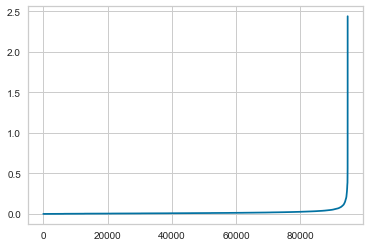

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

Comme nous l’avons vu précédemment nous allons choisir un ε de tel sorte que 90% des observations aient une distance au proche voisin inférieure à ε. Dans notre cas il semble que epsilon soit à rechercher entre 0.25 et 0.5.

### 8.2 | DBScan - premier test

Maintenant que nous avons optimisé notre ε nous pouvons effectuer notre partitionnement en utilisant DBSCAN qui est déjà implémenté dans Scikit-Learn

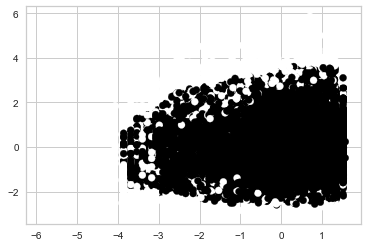

In [135]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps=0.5, min_samples=100).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

The labels of all the instances are now available in the labels_ instance variable:

### 8.3 | DBScan - version alternative

In [168]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [169]:
X = Scaled_Data_RAMS.values

In [220]:
# Configuration options
epsilon = 0.3
min_samples = 100

In [221]:
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [222]:
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [223]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 5
Estimated no. of noise points: 8748


In [224]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    labels = dbscan.labels_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="o", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={} | {} clusters with data".format(dbscan.eps, dbscan.min_samples, len(np.unique(labels))), fontsize=14)

In [225]:
X = Scaled_Data_RAMS.values

Plotting the clustered data

Saving figure dbscan_plot


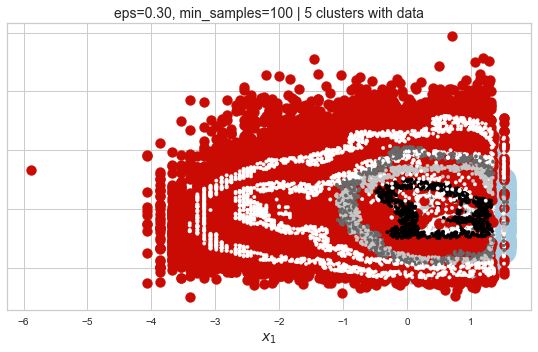

In [226]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plot_dbscan(db, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

Removing the noise and plotting the clustered data

In [227]:
def plot_dbscan_wo_noise(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    labels = dbscan.labels_
    # removing the noise
    labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
#     plt.scatter(anomalies[:, 0], anomalies[:, 1],
#                 c="r", marker="o", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={} | {} clusters with data, noise removed".format(dbscan.eps, dbscan.min_samples, len(np.unique(labels))), fontsize=14)

Saving figure dbscan_plot_wo_noise


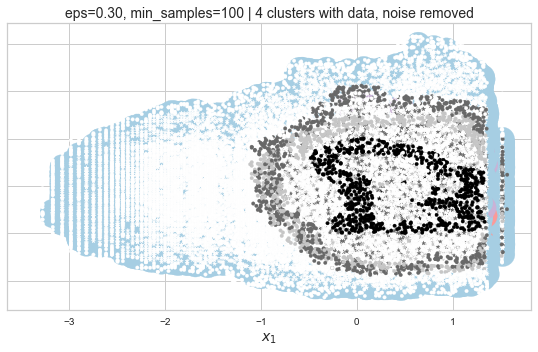

In [228]:
# Remove the noise and plot
plt.figure(figsize=(15, 5))

plt.subplot(121)
plot_dbscan_wo_noise(db, X, size=600, show_ylabels=False)

save_fig("dbscan_plot_wo_noise")
plt.show()